# Representing geographic data in raster format

As we introduced earlier in [Chapter 5.2](https://pythongis.org/part2/chapter-05/nb/01-introduction-to-geographic-data-in-python.html#basics-of-raster-data-and-arrays), the raster data model represents the real-world features (e.g. temperature) as arrays of cells, commonly known as pixels. Raster data is widely used to represent and store data about continuous surfaces, in which each pixel contain specific information (characteristics, radiance, reflectance, spectral signatures) about a specific area of the Earth, such as 10x10 meter area. There are various reasons why you might want to store your data in raster format:

- It is a simple data structure: A matrix of cells with values representing information about the observed surface/phenomena
- It is an efficient way to store data from large continuous surfaces
- It is a powerful format that can be used for various spatial and statistical analysis
- You can perform fast overlays with multiple layers 


## Characteristics of raster data

Different kind of sensors (e.g. remote sensing instruments or *{term}`LIDAR`*) are typically used to capture and collect data about specific aspects of the surface, such as temperature, elevation, or the electromagnetic radiation (light) that the surface reflects. This information can be captured with varying level of detail, depending on the sensor. Many sensors (especially satellite sensors) measure the electromagnetic radiation at specific ranges (i.e. bands) which is why they are called {term}`Multispectral sensors` or {term}`Hyperspectral sensors`. Most typically the raster data produced by these sensors can vary based on their:

- *{term}`spatial resolution`*, i.e. the size of a single pixel
- *{term}`temporal resolution`*, i.e. how frequently the data is captured from the same area of the Earth
- *{term}`spectral resolution`*, i.e. the number and location of spectral bands in the electromagnetic spectrum
- *{term}`radiometric resolution`*, i.e. the range of available brightness values (bit depth), usually measured in bits (binary digits)
- *{term}`spatial extent`*, i.e. how large area of the world a single image represents
- *{term}`coordinate reference system`*, i.e. in what CRS the data is represented 

## Working with raster data in Python

There are a number of libraries that are widely used when working with raster data in Python:

- `xarray` provides a user-friendly and intuitive way to work with multidimensional raster data with coordinates and attributes (somewhat similar to `geopandas` that is used for vector data processing),
- `rioxarray` provides methods to conduct GIS-related operations with raster data (e.g. reading/writing, reprojecting, clipping, resampling),
- `xarray-spatial` provides methods for analysing raster data (e.g. focal/zonal operations, surface analysis, path finding),
- `rasterio` core library for working with GIS raster data. `rioxarray` is an extension of this library that brings the same functionalities on top of `xarray` library,
- `numpy` is a core Python library for numerical computing that is used for representing and working with multidimensional arrays. `numpy` has a big influence on how the other raster libraries function and can be used to generate multidimensional arrays from scratch.

In addition to these ones, there are a number of other libraries that are specialized to specific types of analyses or data. We will learn about a few of them later in the book. 

## Creating a simple raster layer using `numpy`

To get a better sense of how the raster data looks like, we can start by creating a simple two-dimensional array in Python using `numpy`. In the following, we will modify the raster layer to represent a simple terrain that has a hill in the middle of the grid. We do this by setting higher values in the center while the other values are represented with value 0. Let's start by importing the `numpy` and `matplotlib` library which we use for visualizing our data:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Creating a simple 2D raster layer (a 2D array) with 10x10 array can be done easily by using a `numpy` method `.zeros()` with fills the cells (pixels) with zeros. Each zero represents a default pixel value (e.g. 0 elevation). You can think of this as an empty raster grid:

In [7]:
raster_layer = np.zeros((10, 10))
raster_layer

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Now we have a simple 2D array filled with zeros. Next, we modify the raster layer to represent a simple terrain and add larger numbers in the middle of the grid by setting higher values in the center. We can do this by *{term}`slicing`* the numpy array using the indices of the array and updating the numbers on those locations to be higher. Slicing `numpy` arrays happens in a similar manner as when working with Python lists and accessing the items of a list (see Chapter 2.2). However, in this case we do this in two dimensions by accessing the values stored in specific rows and columns by following the syntax: `[start-row-idx: end-row-idx, start-col-idx: end-col-idx]`. Thus, we can update the values in our 2D array as follows:

In [8]:
raster_layer[4:7, 4:7] = 5
raster_layer[5, 5] = 10
raster_layer

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  5.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 10.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  5.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Here we first updated the cells between the fourth and seventh rows and columns (`[4:7, 4:7]`) to have a value `5`, and then we updated the center of the matrix to represent the peak of the hill having a value `10`. As a result, we have a simple raster layer that simulates a simple terrain. We can also plot this raster layer, using `matplotlib` library and its `.imshow()` function that can be used to visualize arrays:

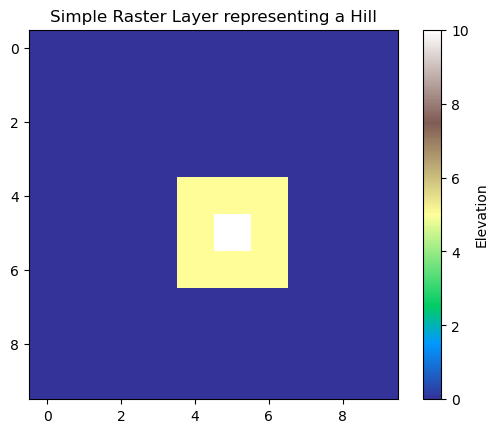

In [13]:
plt.imshow(raster_layer, cmap='terrain'))
plt.colorbar(label='Elevation')
plt.title('Simple Raster Layer representing a Hill')
plt.show()

As a result, we have a simple map that represents the elevation of the hill with different colors. The *{term}`colormap`* of the visualization was determined using the parameter `cmap`, while the `plt.colorbar()` function was used to add a legend to the right side of the image, and the `plt.title()` was used to add a simple title for the image.

This example demonstrates a toy example how we can produce a simple raster layer from scratch. However, there are various aspects related to working with GIS raster data that we did not cover here, such as specifying the metadata for this layer. Basically, the data we have here is simply a two-dimensional array (matrix) that does not tell anything about the *spatial resolution* of the data (i.e. how large each cell is), nor e.g. in which area of the world this data is located (i.e. coordinates) or the *coordinate reference system* this data is represented in. In the next section, we start working with real raster data and cover more aspects that relate to spatial raster data.
